# AR(1)

Simulate time series

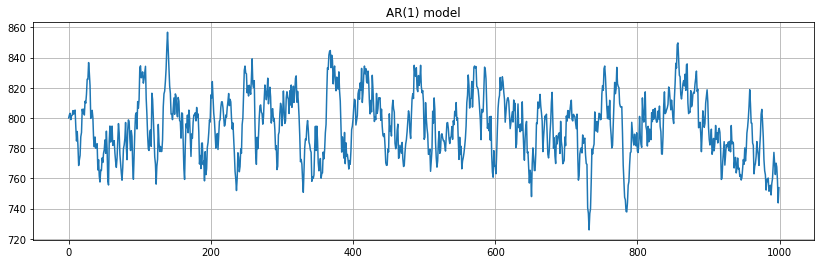

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
SIGMA_EPS = 10
THETA = [0.9]
MU = 800

epsilon = np.random.normal(scale=SIGMA_EPS, size=(N,))
Y = np.ones((N,))*MU
for n in range(1,len(epsilon)):
    Y[n] = MU + (Y[n-1]-MU)*THETA[0] + epsilon[n]
plt.figure(figsize=(14,4))
plt.plot(Y)
plt.title('AR(1) model')
plt.grid()
plt.show()

## Autocorrelation function (ACF)

/Users/andreu/miniconda3/envs/generic/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


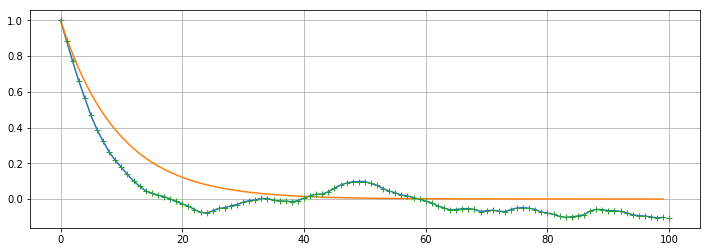

In [2]:
from statsmodels.tsa.stattools import acf

def acf_hat (x):
    n = len(x)
    x = x - x.mean()
    r = np.correlate(x,x,mode='full')[-n:]
    return r/(n*x.var())

# estimated ACF
plt.figure(figsize=(12,4))
plt.plot(acf_hat(Y)[:100])
plt.grid()

# theoretical ACF
theoretical = THETA[0]**np.arange(N)
plt.plot(theoretical[:100])

# from statsmodel
acf_sm, qstat, pval = acf(Y, nlags=100, qstat=True)
plt.plot(acf_sm, '+')
plt.show()


## Model Estimation

In [3]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Y, (1,0,0)).fit()
print (model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -3689.994
Method:                       css-mle   S.D. of innovations              9.682
Date:                Tue, 30 May 2017   AIC                           7385.988
Time:                        20:17:17   BIC                           7400.711
Sample:                             0   HQIC                          7391.584
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        794.3450      2.680    296.365      0.000     789.092     799.598
ar.L1.y        0.8866      0.015     60.557      0.000       0.858       0.915
                                    Roots           

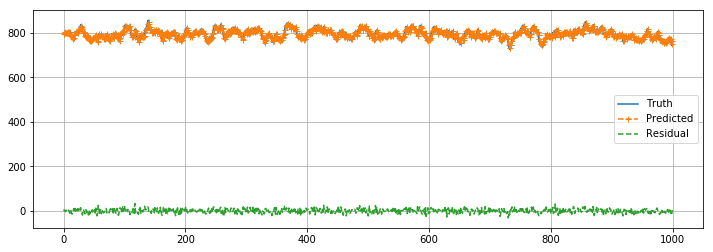

In [4]:
# Plot the residuals and test for their correlation
plt.figure(figsize=(12,4))
plt.plot(Y)
plt.plot(model.fittedvalues, '--+')
plt.plot(model.resid, '--')
plt.grid()
plt.legend(['Truth', 'Predicted', 'Residual'])
plt.show()

## Residual analysis

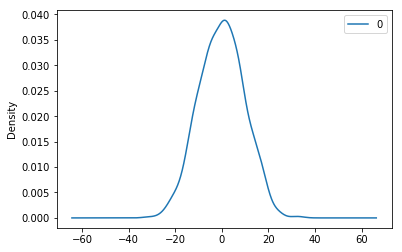

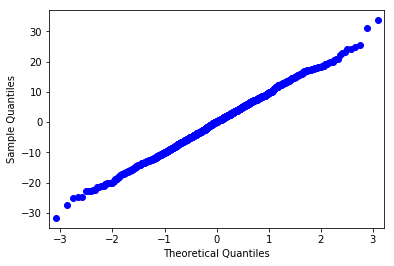

In [5]:
import pandas as pd
from statsmodels.api import qqplot

resid_df = pd.DataFrame(model.resid)
resid_df.plot(kind='kde')
qqplot(model.resid)
plt.show()

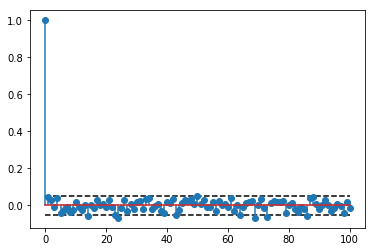

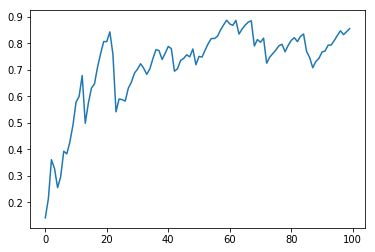

In [25]:
acf_res, qstat, pval = acf(model.resid, nlags=100, qstat=True)
plt.stem(acf_res,)
plt.hlines(0.05, 0,100, linestyle='dashed')
plt.hlines(-0.05, 0,100, linestyle='dashed')
plt.show()

## Forecasting

In [7]:
yhat, std_err, confint = model.forecast()
print ("Predicted value = {}, StdErr = {}, Confidence Interval = {}".format(yhat, std_err, confint))

Predicted value = [ 758.45647122], StdErr = [ 9.68215394], Confidence Interval = [[ 739.47979821  777.43314422]]
